#  scraping app info and reviews from Google Play

## import libraries

In [2]:
import pandas as pd

from google_play_scraper import app, Sort, reviews,reviews_all

import play_scraper

import matplotlib.pyplot as plt

import csv



## get apps ids 

In [57]:
# Our app ids from google play

app_ids = {'Rav-Pass':'co.hopon.client',
       'The Station':'com.ridewithvia.zuzu',
       'ANYWAY':'com.isracard.payments',
       'Moovit':'com.tranzmate'}

# colum of interest to view for app data

cols_of_interest = ['title', 'summary','minInstalls',
             'ratings','genre','reviews','score',
             'free','released','editorsChoice',
            'similarApps']

# colum of interest to view for app data

CSVPath = 'test.csv'

## gets app info

In [11]:
app_info = []

for id in app_ids:
    info = app(app_ids[id],country='il')
    app_info.append(info)   

## make dataframe and csv file 

In [12]:
info_df = pd.DataFrame(app_info)


info_df = info_df[cols_of_interest]

info_df = pd.DataFrame(info_df).to_csv(CSVPath)


In [17]:
pd.read_csv(CSVPath)

,Unnamed: 0,title,summary,minInstalls,ratings,genre,reviews,score,free,released,editorsChoice,similarApps
0,0,Rav-Pass & Rav-Kav by HopOn רב-פס ורב-קו,The official app for public transportation pay...,500000,10608,Maps & Navigation,3080,4.720157,True,"May 4, 2014",False,"['com.pcentra.ravkavonlinemobile', 'com.mosko...."
1,1,The Station,Plan and pay for your public transportation tr...,100000,377,Maps & Navigation,214,2.617647,True,"Dec 13, 2020",False,"['com.pcentra.ravkavonlinemobile', 'co.hopon.c..."
2,2,ANYWAY by ISRACARD,Get to know ANYWAY from Isracard!,100000,400,Maps & Navigation,239,2.267327,True,"Dec 9, 2020",False,"['co.hopon.client', 'il.co.inmanage.meshulam',..."
3,3,Moovit: All Local Transit & Mobility Options,"Timing, navigation & trip planning for all tra...",100000000,1127548,Maps & Navigation,36838,4.246565,True,"Mar 28, 2012",False,"['com.citymapper.app.release', 'com.thetransit..."


# Data Visualization 

### Installations By App millions

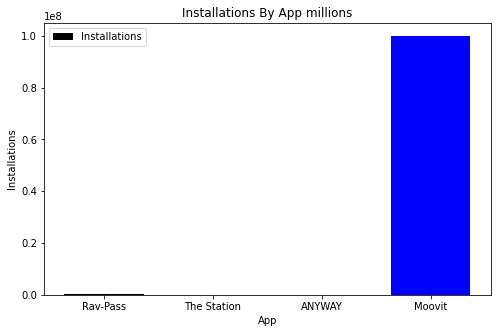

In [79]:
x = []
y = []

plt.figure(figsize=(8,5))  
with open(CSVPath,'r') as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
    next(plots, None)
    for row in plots:
        y.append(int(float(row[3])))
    for i in app_ids:
        x.append(i)

plt.bar(x, y,color = ['black', 'red', 'green', 'blue', 'cyan','grey'], width = 0.73, label = 'Installations')
plt.xlabel('App')
plt.ylabel('Installations')
plt.title('Installations By App millions')
plt.legend()
plt.show()

### Avarage Rating By App 

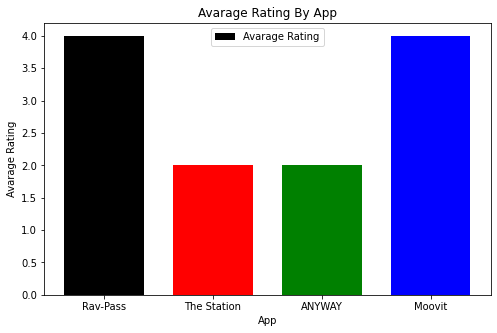

In [63]:

x = []
y = []

plt.figure(figsize = (8,5))  

with open(CSVPath,'r') as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
    next(plots, None) 
    
    for row in plots:
        y.append(int(float(row[7])))
    
    for i in app_ids:
        x.append(i)

plt.bar(x, y,color = ['black', 'red', 'green', 'blue', 'cyan','grey'], width = 0.73, label = 'Avarage Rating')
plt.xlabel('App')
plt.ylabel('Avarage Rating')
plt.title('Avarage Rating By App')
plt.legend()
plt.show()

### Avarage Rating By App Category

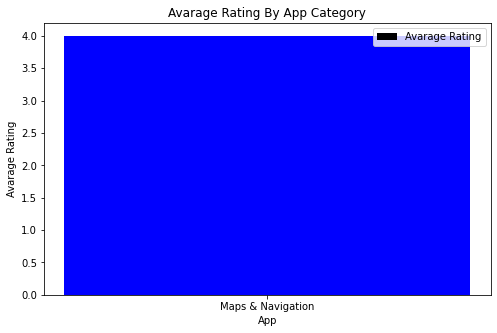

In [74]:
x = []
y = []

plt.figure(figsize=(8,5))  

with open(CSVPath,'r') as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
    next(plots, None) 
    
    for row in plots:
        y.append(int(float(row[7])))
        x.append(row[5])

plt.bar(x, y,color = ['black', 'red', 'green', 'blue', 'cyan','grey'], width = 0.73, label = 'Avarage Rating')
plt.xlabel('App')
plt.ylabel('Avarage Rating')
plt.title('Avarage Rating By App Category')
plt.legend()
plt.show()

###  Amount Of Reviews By App

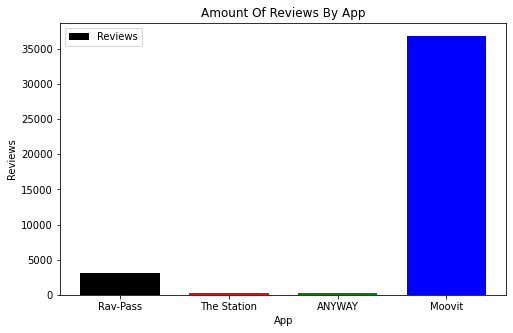

In [78]:
x = []
y = []

plt.figure(figsize=(8,5))  

with open(CSVPath,'r') as csvfile:
    plots = csv.reader(csvfile, delimiter = ',')
    next(plots, None) 
    
    for row in plots:
        y.append(int(float(row[6])))
    
    for i in app_ids:
        x.append(i)

plt.bar(x, y,color = ['black', 'red', 'green', 'blue', 'cyan','grey'], width = 0.73, label = 'Reviews')
plt.xlabel('App')
plt.ylabel('Reviews')
plt.title('Amount Of Reviews By App')
plt.legend()
plt.show()

### Amount Of Reviews By App 

## get app reviews

In [26]:
# collect data from google store

for id in app_ids:
    result = reviews_all(app_ids[id])

In [34]:
# Fetch a list data
comments = []
for r in result:
    comment = [r['userName'],
               r['content'],
               r['score'],
               r['at']
              ]
    comments.append(comment)

header = ['User Name', ' Review', 'Rate', 'Date']
pd.DataFrame(comments, columns=header).to_excel('reviews.xlsx')


In [7]:
df = pd.read_excel('reviews.xlsx')

df

,Unnamed: 0,User Name,Review,Rate,Date
0,0,Tailaine Brasil Regis,Melhor app para locomoção Urbana vía transport...,5,2021-12-18 14:36:13
1,1,A Google user,"La aplicación es muy buena, pero las publicida...",3,2021-12-18 13:04:27
2,2,Marie Ona,Excellent,5,2021-12-18 12:46:50
3,3,Louise Steele,Doesn't always work when planning routes,2,2021-12-18 10:58:39
4,4,Özcan Asilkan,Great app. I was surprised to see its performa...,5,2021-12-18 07:55:45
...,...,...,...,...,...
51452,51452,A Google user,"אפליקציה מעולה, רק ההרשאה של פרטי הטלפון לא נח...",4,2012-03-29 22:55:41
51453,51453,A Google user,אפליקציה ממש טובה לכל משתמשי התחבורה הציבורית!...,5,2012-03-29 20:54:11
51454,51454,A Google user,"נוח, מהיר, יעיל, שימושי. רק מילים טובות יש לי ...",5,2012-03-29 18:56:41
51455,51455,A Google user,"תוכנה מדהימה,הדבר הכי טוב שיצא בשנה האחרונה",5,2012-03-29 17:13:03


## Fetch a list of autocompleted query suggestion

In [75]:
import play_scraper

print(play_scraper.suggestions('moveit'))

['moveit', 'moveit bus app', 'moveitpro', 'moveit transfer', 'moveit move media to sd card']


## Fetch a list of applications matching a search query

In [76]:
print(play_scraper.search('the station', page=2))

[{'app_id': 'com.ridewithvia.zuzu', 'url': '/store/apps/details?id=com.ridewithvia.zuzu', 'icon': 'https://play-lh.googleusercontent.com/U1Fww08aIXfkrrsuBAnevg8EWi5axf6p14685dGnRGX7ig07NFl2C2fGfZSY3plNGec=s128-rw', 'title': 'The Station', 'developer': 'Via Transportation Inc.', 'developer_id': 'Via Transportation Inc.', 'description': 'Plan and pay for your public transportation trips in Israel with The Station app', 'score': None, 'full_price': '0', 'price': '0', 'free': True}, {'app_id': 'money.terra.station', 'url': '/store/apps/details?id=money.terra.station', 'icon': 'https://play-lh.googleusercontent.com/sUJQKb2HeZZ4y2dFuHhVoCheiX2fR2It35fgU4_6ow0i51EgsgvZLfjXUrLQo_Of6Fs=s128-rw', 'title': 'Terra Station', 'developer': 'Terraform Labs', 'developer_id': 'Terraform Labs', 'description': 'Official wallet app for holding assets and accessing dApps on the Terra network', 'score': None, 'full_price': '0', 'price': '0', 'free': True}, {'app_id': 'com.istation.runtime', 'url': '/store/ap